<a href="https://colab.research.google.com/github/nikhil730/PopulationPredictor/blob/main/Population_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
import re

In [ ]:
from google.colab import files
uploades=files.upload()

Saving Road_Accidents_India.csv to Road_Accidents_India.csv


In [ ]:
df=pd.read_csv("Road_Accidents_India.csv")
df

,Years,Total_Number_of_Road_Accidents,Total_Number_of_Persons_Killed,Total_Number_of_Persons_Injured,Population_of_India,Total Number of Registered Motor Vehicles,Road Length,Number of Accidents per Lakh Population,Number of Accidents per Ten Thousand Vehicles,Number of Accidents per Ten Thousand Kms of Roads,Number of Persons Killed Per Lakh Population,Number of Persons Killed Per Ten Thousand Vehicles,Number of Persons Killed per Ten Thousand Kms of Roads,Number of Persons Injured per Lakh Population,Number of Persons Injured Per Ten Thousand Vehicles,Number of Persons Injured Per Ten Thousand Kms of Roads
0,1970,114100,14500,70100,539000.0,1401.0,1188728.0,21.2,814.4,959.8,2.7,103.5,122.0,13.0,500.4,589.7
1,1980,153200,24000,109100,673000.0,4521.0,1491873.0,22.8,338.9,1026.9,3.6,53.1,160.9,16.2,241.3,731.3
2,1990,282600,54100,244100,835000.0,19152.0,1983867.0,33.8,147.6,1424.5,6.5,28.2,272.7,29.2,127.5,1230.4
3,1994,325864,64463,311500,904000.0,27660.0,2890950.0,36.0,117.8,1127.2,7.1,23.3,223.0,34.5,112.6,1077.5
4,1995,351999,70781,323200,924359.0,30295.0,2975035.0,38.1,116.2,1183.2,7.7,23.4,237.9,35.0,106.7,1086.4
5,1996,371204,74665,369502,941579.0,33786.0,3202515.0,39.4,109.9,1159.1,7.9,22.1,233.1,39.2,109.4,1153.8
6,1997,373671,76977,378361,959792.0,37332.0,3298788.0,38.9,100.1,1132.8,8.0,20.6,233.3,39.4,101.4,1147.0
7,1998,385018,79919,390674,978081.0,41368.0,3228356.0,39.4,93.1,1192.6,8.2,19.3,247.6,39.9,94.4,1210.1
8,1999,386456,81966,375051,996130.0,44875.0,3296650.0,38.8,86.1,1172.3,8.2,18.3,248.6,37.7,83.6,1137.7
9,2000,391449,78911,399265,1014825.0,48857.0,3316078.0,38.6,80.1,1180.5,7.8,16.2,238.0,39.3,81.7,1204.0


In [ ]:
df = df.rename(columns=lambda x: re.sub(' ','_',x))
df.head(6)

,Years,Total_Number_of_Road_Accidents,Total_Number_of_Persons_Killed,Total_Number_of_Persons_Injured,Population_of_India,Total_Number_of_Registered_Motor_Vehicles,Road_Length,Number_of_Accidents_per_Lakh_Population,Number_of_Accidents_per_Ten_Thousand_Vehicles,Number_of_Accidents_per_Ten_Thousand_Kms_of_Roads,Number_of_Persons_Killed_Per_Lakh_Population,Number_of_Persons_Killed_Per_Ten_Thousand_Vehicles,Number_of_Persons_Killed_per_Ten_Thousand_Kms_of_Roads,Number_of_Persons_Injured_per_Lakh_Population,Number_of_Persons_Injured_Per_Ten_Thousand_Vehicles,Number_of_Persons_Injured_Per_Ten_Thousand_Kms_of_Roads
0,1970,114100,14500,70100,539000.0,1401.0,1188728.0,21.2,814.4,959.8,2.7,103.5,122.0,13.0,500.4,589.7
1,1980,153200,24000,109100,673000.0,4521.0,1491873.0,22.8,338.9,1026.9,3.6,53.1,160.9,16.2,241.3,731.3
2,1990,282600,54100,244100,835000.0,19152.0,1983867.0,33.8,147.6,1424.5,6.5,28.2,272.7,29.2,127.5,1230.4
3,1994,325864,64463,311500,904000.0,27660.0,2890950.0,36.0,117.8,1127.2,7.1,23.3,223.0,34.5,112.6,1077.5
4,1995,351999,70781,323200,924359.0,30295.0,2975035.0,38.1,116.2,1183.2,7.7,23.4,237.9,35.0,106.7,1086.4
5,1996,371204,74665,369502,941579.0,33786.0,3202515.0,39.4,109.9,1159.1,7.9,22.1,233.1,39.2,109.4,1153.8


In [ ]:
div=np.random.rand(len(df))<0.75
train=df[div]
test=df[~div]

In [ ]:
reg=linear_model.LinearRegression()
X=np.asanyarray(train[['Years','Population_of_India']])
y=np.asanyarray(train[['Total_Number_of_Road_Accidents']])
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

array([[-1.62765912e+04,  1.54012989e+00]])

In [ ]:
Y=reg.predict(X)

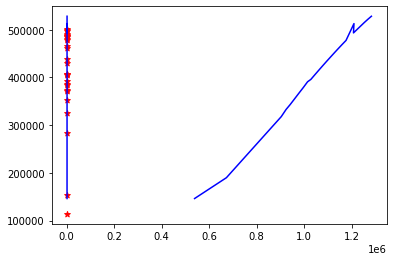

In [ ]:
plt.scatter(df.Years,df.Total_Number_of_Road_Accidents,color='red',marker='*')
plt.plot(X,Y,color='blue')

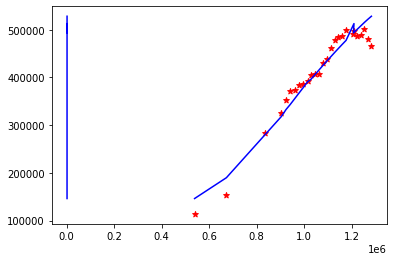

In [ ]:
plt.scatter(df.Population_of_India,df.Total_Number_of_Road_Accidents,color='red',marker='*')
plt.plot(X,Y,color='blue')

In [ ]:
r2_score(y,Y)

0.9428720361694336

In [ ]:
reg.predict([[2017,1.283601e+06]])

array([[528101.86390897]])

# New Section

In [ ]:
df.head(6)

,Years,Total_Number_of_Road_Accidents,Total_Number_of_Persons_Killed,Total_Number_of_Persons_Injured,Population_of_India,Total Number of Registered Motor Vehicles,Road Length,Number of Accidents per Lakh Population,Number of Accidents per Ten Thousand Vehicles,Number of Accidents per Ten Thousand Kms of Roads,Number of Persons Killed Per Lakh Population,Number of Persons Killed Per Ten Thousand Vehicles,Number of Persons Killed per Ten Thousand Kms of Roads,Number of Persons Injured per Lakh Population,Number of Persons Injured Per Ten Thousand Vehicles,Number of Persons Injured Per Ten Thousand Kms of Roads
0,1970,114100,14500,70100,539000.0,1401.0,1188728.0,21.2,814.4,959.8,2.7,103.5,122.0,13.0,500.4,589.7
1,1980,153200,24000,109100,673000.0,4521.0,1491873.0,22.8,338.9,1026.9,3.6,53.1,160.9,16.2,241.3,731.3
2,1990,282600,54100,244100,835000.0,19152.0,1983867.0,33.8,147.6,1424.5,6.5,28.2,272.7,29.2,127.5,1230.4
3,1994,325864,64463,311500,904000.0,27660.0,2890950.0,36.0,117.8,1127.2,7.1,23.3,223.0,34.5,112.6,1077.5
4,1995,351999,70781,323200,924359.0,30295.0,2975035.0,38.1,116.2,1183.2,7.7,23.4,237.9,35.0,106.7,1086.4
5,1996,371204,74665,369502,941579.0,33786.0,3202515.0,39.4,109.9,1159.1,7.9,22.1,233.1,39.2,109.4,1153.8


In [ ]:
df = df.rename(columns=lambda x: re.sub(' ','_',x))
df.head(6)

,Years,Total_Number_of_Road_Accidents,Total_Number_of_Persons_Killed,Total_Number_of_Persons_Injured,Population_of_India,Total_Number_of_Registered_Motor_Vehicles,Road_Length,Number_of_Accidents_per_Lakh_Population,Number_of_Accidents_per_Ten_Thousand_Vehicles,Number_of_Accidents_per_Ten_Thousand_Kms_of_Roads,Number_of_Persons_Killed_Per_Lakh_Population,Number_of_Persons_Killed_Per_Ten_Thousand_Vehicles,Number_of_Persons_Killed_per_Ten_Thousand_Kms_of_Roads,Number_of_Persons_Injured_per_Lakh_Population,Number_of_Persons_Injured_Per_Ten_Thousand_Vehicles,Number_of_Persons_Injured_Per_Ten_Thousand_Kms_of_Roads
0,1970,114100,14500,70100,539000.0,1401.0,1188728.0,21.2,814.4,959.8,2.7,103.5,122.0,13.0,500.4,589.7
1,1980,153200,24000,109100,673000.0,4521.0,1491873.0,22.8,338.9,1026.9,3.6,53.1,160.9,16.2,241.3,731.3
2,1990,282600,54100,244100,835000.0,19152.0,1983867.0,33.8,147.6,1424.5,6.5,28.2,272.7,29.2,127.5,1230.4
3,1994,325864,64463,311500,904000.0,27660.0,2890950.0,36.0,117.8,1127.2,7.1,23.3,223.0,34.5,112.6,1077.5
4,1995,351999,70781,323200,924359.0,30295.0,2975035.0,38.1,116.2,1183.2,7.7,23.4,237.9,35.0,106.7,1086.4
5,1996,371204,74665,369502,941579.0,33786.0,3202515.0,39.4,109.9,1159.1,7.9,22.1,233.1,39.2,109.4,1153.8


Text(0, 0.5, 'Population Of India')

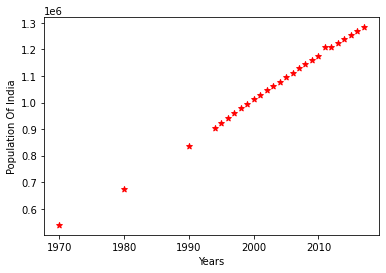

In [ ]:
plt.scatter(df.Years,df.Population_of_India,color='red',marker='*')
plt.xlabel("Years")
plt.ylabel("Population Of India")


In [ ]:
regr=linear_model.LinearRegression()
X=np.asanyarray(df[['Years']])
y=np.asanyarray(df[['Population_of_India']])
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y=regr.predict(X)

Text(0, 0.5, 'Population Of India')

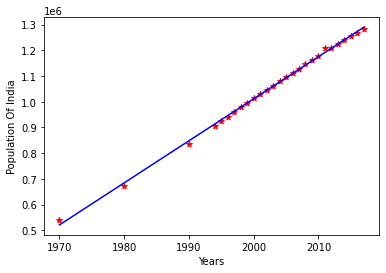

In [ ]:
plt.scatter(df.Years,df.Population_of_India,color='red',marker='*')
plt.plot(X,Y,color='blue')
plt.xlabel("Years")
plt.ylabel("Population Of India")

In [ ]:
df.describe()

,Years,Total_Number_of_Road_Accidents,Total_Number_of_Persons_Killed,Total_Number_of_Persons_Injured,Population_of_India,Total_Number_of_Registered_Motor_Vehicles,Road_Length,Number_of_Accidents_per_Lakh_Population,Number_of_Accidents_per_Ten_Thousand_Vehicles,Number_of_Accidents_per_Ten_Thousand_Kms_of_Roads,Number_of_Persons_Killed_Per_Lakh_Population,Number_of_Persons_Killed_Per_Ten_Thousand_Vehicles,Number_of_Persons_Killed_per_Ten_Thousand_Kms_of_Roads,Number_of_Persons_Injured_per_Lakh_Population,Number_of_Persons_Injured_Per_Ten_Thousand_Vehicles,Number_of_Persons_Injured_Per_Ten_Thousand_Kms_of_Roads
count,27.000000,27.000000,27.000000,27.000000,2.700000e+01,26.000000,2.600000e+01,27.000000,26.000000,26.000000,27.000000,26.000000,26.000000,27.000000,26.000000,26.000000
mean,2002.666667,409124.740741,98610.037037,414851.666667,1.055093e+06,87399.469231,3.728652e+06,38.122222,104.323077,1110.134615,8.970370,19.150000,250.873077,38.285185,88.415385,1101.192308
std,10.891069,99090.505944,37324.713290,119381.716096,1.783049e+05,64790.829467,1.139316e+06,5.060506,158.026530,123.853194,2.375972,19.664816,38.969543,7.747640,95.741747,175.563096
min,1970.000000,114100.000000,14500.000000,70100.000000,5.390000e+05,1401.000000,1.188728e+06,21.200000,20.900000,857.800000,2.700000,6.600000,122.000000,13.000000,21.500000,589.700000
25%,1997.500000,379344.500000,77944.000000,376706.000000,9.689365e+05,38341.000000,3.245430e+06,38.200000,39.900000,1036.225000,7.900000,10.600000,238.450000,38.350000,42.175000,1055.000000
50%,2004.000000,429910.000000,92618.000000,464521.000000,1.079117e+06,69862.500000,3.575080e+06,39.400000,59.900000,1152.900000,8.600000,12.750000,252.500000,39.800000,64.400000,1152.000000
75%,2010.500000,485544.000000,136042.500000,498380.000000,1.192429e+06,124547.250000,4.554707e+06,40.350000,98.350000,1186.125000,11.250000,20.275000,272.650000,42.400000,99.650000,1218.650000
max,2017.000000,501423.000000,150785.000000,527512.000000,1.283601e+06,230031.000000,5.603293e+06,42.500000,814.400000,1424.500000,11.900000,103.500000,304.700000,45.700000,500.400000,1282.700000


In [ ]:
year=int(input("Enter the year: "))
prediction=regr.predict([[year]])
print(f"In {year}, Population of India {state} = {prediction*1000}")

Enter the year: 2001
In 2001, Population of India is = [[1.02782718e+09]]


In [ ]:
r2_score(y,Y)

0.9984965952841962

In [ ]:
if year<2021:
  state="was"
elif year>2021:
  state="will be"
elif year==2021:
  state="is"    